In [82]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv('data.csv')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39149,15366.0,for_sale,274000.0,3.0,2.0,0.23,893368.0,East Haven,Connecticut,6512.0,1426.0,2005-07-29
39150,22611.0,for_sale,279900.0,2.0,2.0,0.11,654312.0,East Haven,Connecticut,6512.0,1264.0,1993-02-01
39151,107953.0,for_sale,249900.0,4.0,2.0,0.17,1584359.0,East Haven,Connecticut,6512.0,1349.0,NaN
39152,39954.0,for_sale,449900.0,5.0,3.0,0.11,1725145.0,East Haven,Connecticut,6512.0,2041.0,2003-01-31


In [4]:
#Printing the information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     39147 non-null  float64
 1   status          39154 non-null  object 
 2   price           39154 non-null  float64
 3   bed             28962 non-null  float64
 4   bath            29030 non-null  float64
 5   acre_lot        33289 non-null  float64
 6   street          39059 non-null  float64
 7   city            39138 non-null  object 
 8   state           39153 non-null  object 
 9   zip_code        39125 non-null  float64
 10  house_size      29236 non-null  float64
 11  prev_sold_date  13405 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.6+ MB
None


About the columns in the dataset:

1. brokered_by (`float64`): Agency or broker associated with the property listing, categorically encoded as numeric values.
2. status (`object`): Housing status, either "ready for sale" or "ready to build."
3. price (`float64`): Current listing price or recently sold price of the property.
4. bed (`float64`): Number of bedrooms in the property.
5. bath (`float64`): Number of bathrooms in the property.
6. acre_lot (`float64`): Property or land size in acres.
7. street (`float64`): Street address of the property, categorically encoded as numeric values.
8. city (`object`): City where the property is located.
9. state (`object`): State where the property is located.
10. zip_code (`float64`): Postal code of the area where the property is located.
11. house_size (`float64`): Size of the house or living space in square feet.
12. prev_sold_date (`object`): Date when the property was previously sold.

In [5]:
#Changing the data type of brokered_by, street and zip_code to string
df['brokered_by'] = df['brokered_by'].astype(str)
df['street'] = df['street'].astype(str)
df['zip_code'] = df['zip_code'].astype(str)

The data type of columns brokered_by, street, and zip_code have been changed from numbers to text. This makes it easier to work with these categories as labels instead of numbers.

In [6]:
#Checking the missing values in the dataframe
print(df.isnull().sum())

brokered_by           0
status                0
price                 0
bed               10192
bath              10124
acre_lot           5865
street                0
city                 16
state                 1
zip_code              0
house_size         9918
prev_sold_date    25749
dtype: int64



*  The columns with the most missing values are house_size and prev_sold_date.
*  The bed and bath columns also have a significant number of missing values.
*   Price, a critical column for analysis and modeling, has 335 missing values that need to be addressed.
*   The categorical columns brokered_by, street, and zip_code have no missing values, making them easier to work with during encoding.





In [7]:
##Printing the information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     39154 non-null  object 
 1   status          39154 non-null  object 
 2   price           39154 non-null  float64
 3   bed             28962 non-null  float64
 4   bath            29030 non-null  float64
 5   acre_lot        33289 non-null  float64
 6   street          39154 non-null  object 
 7   city            39138 non-null  object 
 8   state           39153 non-null  object 
 9   zip_code        39154 non-null  object 
 10  house_size      29236 non-null  float64
 11  prev_sold_date  13405 non-null  object 
dtypes: float64(5), object(7)
memory usage: 3.6+ MB
None


The DataFrame has 2226382  entries and 12 columns. The columns brokered_by, street, and zip_code are now of type object(string).

In [8]:
#Checking the description of the data in dataframe
print(df.describe())

              price           bed          bath       acre_lot    house_size
count  3.915400e+04  28962.000000  29030.000000   33289.000000  2.923600e+04
mean   6.044362e+05      3.467854      2.552187      25.270797  2.227991e+03
std    1.211395e+06      2.030758      1.978966    1236.480212  8.700302e+03
min    1.000000e+00      1.000000      1.000000       0.000000  1.000000e+02
25%    1.749000e+05      2.000000      2.000000       0.230000  1.224000e+03
50%    3.399000e+05      3.000000      2.000000       0.700000  1.756000e+03
75%    6.099000e+05      4.000000      3.000000       2.500000  2.588000e+03
max    6.000000e+07     99.000000    198.000000  100000.000000  1.450112e+06


In [9]:
#Coverting the prev_sold_date to datetime and filling the missing values
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')
df['prev_sold_date'] = df['prev_sold_date'].fillna(pd.to_datetime('2000-01-01'))

The prev_sold_date column has been converted to datetime format. Missing values have been filled with January 1, 2000.

In [10]:
# Calculating the percentage of NaN values in each column
def calculate_nan_percentage(data):
    nan_percentage = data.isna().mean() * 100
    return nan_percentage.reset_index().rename(columns={0: 'NaN_Percentage', 'index': 'Column'})

It calculates and returns the percentage of NaN values in each column of the DataFrame, showing it as a percentage.

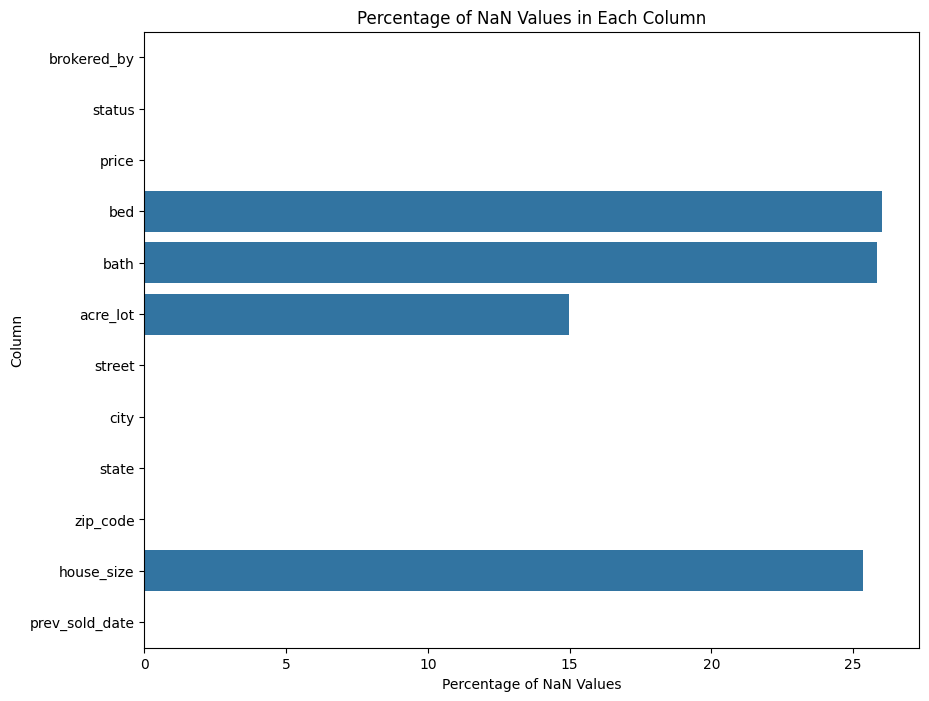

In [11]:
#Visualizing the percentage of missing values (NaN) in each column of a DataFrame
nan_percentage = calculate_nan_percentage(df)
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
sns.barplot(data=nan_percentage, x='NaN_Percentage', y='Column')  # Create a bar plot using seaborn
plt.title('Percentage of NaN Values in Each Column')  # Set the plot title
plt.xlabel('Percentage of NaN Values')  # Set the x-axis label
plt.ylabel('Column')  # Set the y-axis label
plt.show()

The bar plot shows that price, house_size, bed, bath, and acre_lot have significant missing values.

Step 1:  Data Cleaning

In [12]:
#Creating a new DataFrame by removing any rows from the original DataFrame df where the price column contain missing values
df_clean = df.dropna(subset=['price'])


In [13]:
#Filtering the DataFrame df_clean to keep only the rows that have fewer than 3 missing values
df_clean = df_clean[df_clean.isna().sum(axis=1) < 3]


In [14]:
#Filling any missing values in the house_size column of the DataFrame with the median value of the house_size column
df_clean['house_size'] = df_clean['house_size'].fillna(df_clean['house_size'].median())

In [15]:
#Calculating the average number of bathrooms for each bedroom, rounding the averages to the nearest whole number, and storing the result in a new DataFrame
avg_bath_by_bed = df_clean.groupby('bed')['bath'].mean().round(0).reset_index()
avg_bath_by_bed.columns = ['bed', 'bath_avg']


In [16]:
#Merging the avg_bath_by_bed DataFrame with df_clean on the bed column, adding the bath_avg column to df_clean
df_clean = df_clean.merge(avg_bath_by_bed, on='bed', how='left')

In [17]:
#Filling the missing values in the bath column of df_clean with corresponding values from the bath_avg column
df_clean['bath'] = df_clean['bath'].fillna(df_clean['bath_avg'])

In [18]:
#Removing the bath_avg column from the df_clean DataFrame
df_clean = df_clean.drop(columns=['bath_avg'])

In [19]:
#Filling any missing values in the bed column of df_clean with the median value of the bed column
df_clean['bed'] = df_clean['bed'].fillna(df_clean['bed'].median())


In [20]:
#Calculating the percentage of missing values for each column in the df_clean DataFrame and storin g the result in nan_percentage_clean
nan_percentage_clean = calculate_nan_percentage(df_clean)
nan_percentage_clean

,Column,NaN_Percentage
0,brokered_by,0.000000
1,status,0.000000
2,price,0.000000
3,bed,0.000000
4,bath,0.960527
5,acre_lot,19.682313
6,street,0.000000
7,city,0.006788
8,state,0.003394
9,zip_code,0.000000


In [21]:
# Imputing numerical columns with median
for col in ['bed', 'bath', 'acre_lot', 'house_size']:
    df_clean[col] = df_clean[col].fillna(df[col].median())

# Imputing categorical columns with mode
df_clean['city'] = df_clean['city'].fillna(df['city'].mode()[0])
df_clean['state'] = df_clean['state'].fillna(df['state'].mode()[0])

# Ensuring 'price' has no NaNs
df_clean = df_clean.dropna(subset=['price'])

In [22]:
# Ensuring all columns are numeric
numeric_columns = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


The specified columns in df_clean are now in a numeric format, with any non-convertible values replaced by NaN, ensuring the dataset is ready for further numerical analysis and modeling.

In [23]:
df_final = df_clean.dropna(subset=numeric_columns)
df_final

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,2000-01-01
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,2000-01-01
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,2000-01-01
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,2000-01-01
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1756.0,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
29458,15366.0,for_sale,274000.0,3.0,2.0,0.23,893368.0,East Haven,Connecticut,6512.0,1426.0,2005-07-29
29459,22611.0,for_sale,279900.0,2.0,2.0,0.11,654312.0,East Haven,Connecticut,6512.0,1264.0,1993-02-01
29460,107953.0,for_sale,249900.0,4.0,2.0,0.17,1584359.0,East Haven,Connecticut,6512.0,1349.0,2000-01-01
29461,39954.0,for_sale,449900.0,5.0,3.0,0.11,1725145.0,East Haven,Connecticut,6512.0,2041.0,2003-01-31


Step 2: Feature Engineering

In [24]:
# Calculating the price per square foot for each house and addding it as a new column in the DataFrame
df_final['price_per_sqft'] = df_final['price'] / df_final['house_size']

In [25]:
# Calculating the total number of rooms by adding the number of bedrooms and bathrooms, and adding it as a new column in the DataFrame
df_final['total_rooms'] = df_final['bed'] + df_final['bath']

In [26]:
# Calculating the current year
current_year = pd.Timestamp.now().year

# Calculating the age of the house by subtracting the year of the previous sale date from the current year
# Adding this calculation as a new column 'house_age' in the DataFrame
df_final['house_age'] = current_year - pd.DatetimeIndex(df_final['prev_sold_date']).year


In [27]:
# Removing rows with missing values in the 'price_per_sqft', 'total_rooms', or 'house_age' columns.
df_final = df_final.dropna(subset=['price_per_sqft', 'total_rooms', 'house_age'])
df_final


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_per_sqft,total_rooms,house_age
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,2000-01-01,114.130435,5.0,24
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,2000-01-01,52.390308,6.0,24
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,2000-01-01,89.572193,3.0,24
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,2000-01-01,80.555556,6.0,24
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1756.0,2000-01-01,37.015945,8.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29458,15366.0,for_sale,274000.0,3.0,2.0,0.23,893368.0,East Haven,Connecticut,6512.0,1426.0,2005-07-29,192.145863,5.0,19
29459,22611.0,for_sale,279900.0,2.0,2.0,0.11,654312.0,East Haven,Connecticut,6512.0,1264.0,1993-02-01,221.439873,4.0,31
29460,107953.0,for_sale,249900.0,4.0,2.0,0.17,1584359.0,East Haven,Connecticut,6512.0,1349.0,2000-01-01,185.248332,6.0,24
29461,39954.0,for_sale,449900.0,5.0,3.0,0.11,1725145.0,East Haven,Connecticut,6512.0,2041.0,2003-01-31,220.431161,8.0,21


Step 3: Encoding

In [28]:
#Encoding Categorical Variables
categorical_columns = ['brokered_by', 'status', 'street', 'city', 'state', 'zip_code']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in df_final.columns:
        df_final[col] = label_encoder.fit_transform(df_final[col].astype(str))

# Ensuring all columns are numeric
numeric_columns = df_final.select_dtypes(include=[np.number]).columns.tolist()

Step 4: Feature Scaling

In [29]:
# Initializing a StandardScaler to standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Applying the scaler to the numerical columns, including 'price_per_sqft', 'total_rooms', and 'house_age'
# This scales the features to have a mean of 0 and a standard deviation of 1
scaled_features = scaler.fit_transform(df_final[numeric_columns + ['price_per_sqft', 'total_rooms', 'house_age']])

# Creating a new DataFrame with the scaled features, using the same column names as the original numerical columns
df_scaled = pd.DataFrame(scaled_features, columns=numeric_columns + ['price_per_sqft', 'total_rooms', 'house_age'])

# Adding categorical columns from df_final to the scaled DataFrame df_scaled
for col in categorical_columns:
    df_scaled[col] = df_final[col].values


Step 5: Data Visualization

In [30]:
# Checking for remaining NaNs
print(df_scaled.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
price_per_sqft    0
total_rooms       0
house_age         0
price_per_sqft    0
total_rooms       0
house_age         0
dtype: int64


In [31]:
# Dropping duplicate columns
df_scaled = df_scaled.loc[:,~df_scaled.columns.duplicated()]

# Checking the columns again to ensure duplicates are removed
print(df_scaled.columns)


Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'price_per_sqft',
       'total_rooms', 'house_age'],
      dtype='object')


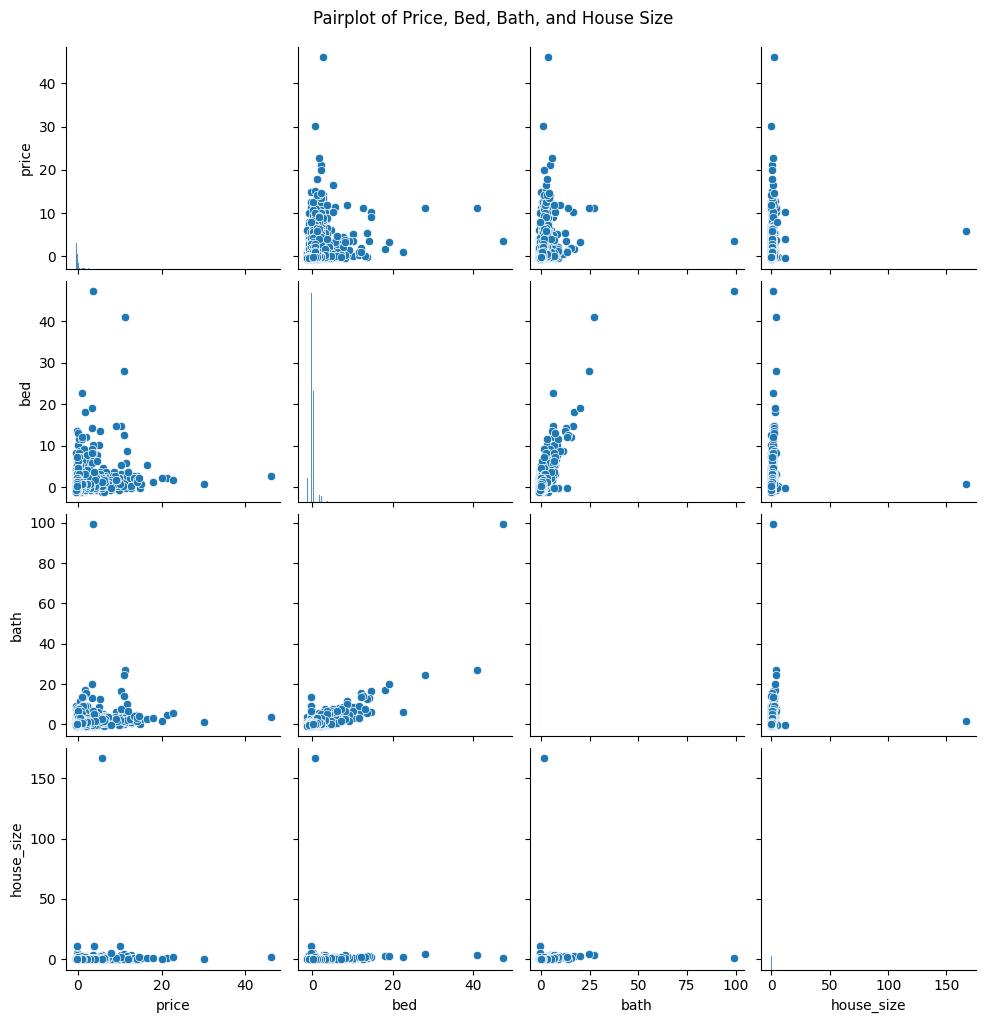

In [32]:
# Pair plot
sns.pairplot(df_scaled[['price', 'bed', 'bath', 'house_size']])
plt.suptitle('Pairplot of Price, Bed, Bath, and House Size', y=1.02)
plt.show()


*   The pair plot suggests positive relationships between price and other features like bed, bath, and house_size.
*  Price vs. House Size: Positive correlation where larger houses generally have higher prices.
*   Bed vs. Bath: Strong clustering, indicating houses with more bedrooms tend to have more bathrooms.
*   Most data points are clustered at lower values for all features, indicating that the majority of houses are smaller and lower-priced.






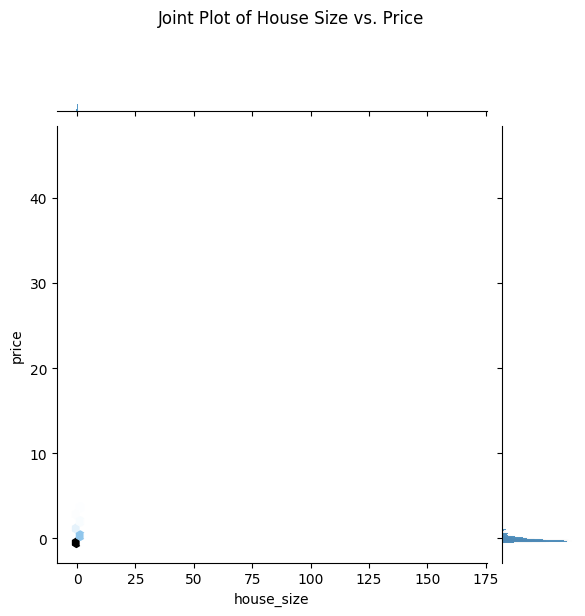

In [33]:
# Joint plot of House size Vs. Price
sns.jointplot(x='house_size', y='price', data=df_scaled, kind='hex')
plt.suptitle('Joint Plot of House Size vs. Price', y=1.02)
plt.show()

 We can see the data points are highly concentrated near the origin (low values) for both house_size and price.

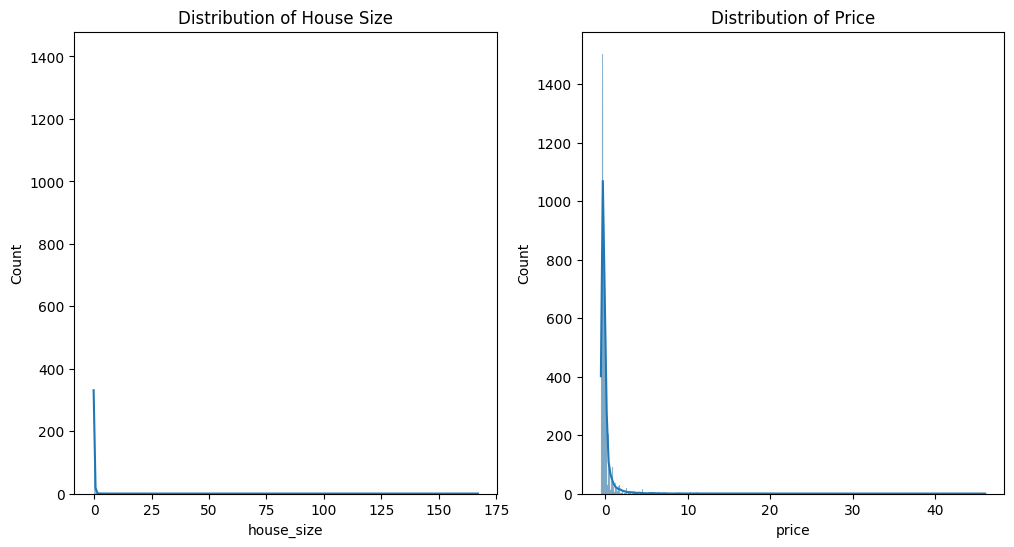

In [34]:
# Plotting the distribution of house_size and price
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df_scaled['house_size'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of House Size')
sns.histplot(df_scaled['price'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Price')
plt.show()


Insights obtained from the distribution:

*   Skewness: Both distributions are right-skewed, indicating that the majority of houses are relatively small and low-priced, with a few high-value outliers.
* Outliers: The presence of extreme outliers affects the overall distribution, making it difficult to analyze the bulk of the data without further transformation or filtering.
*  Data Quality: The skewness and outliers suggest that data preprocessing steps, such as log transformation or robust scaling, may be necessary to improve the analysis and visualization.



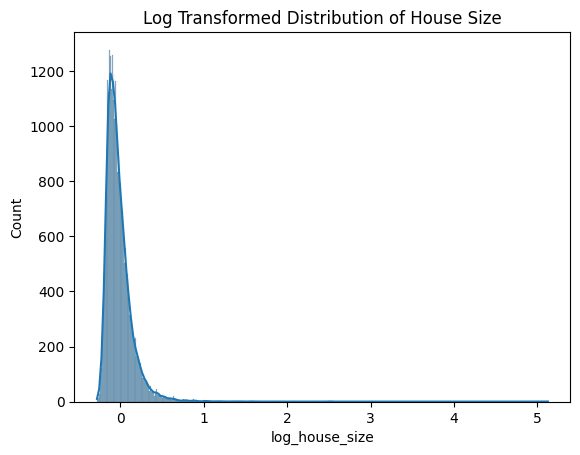

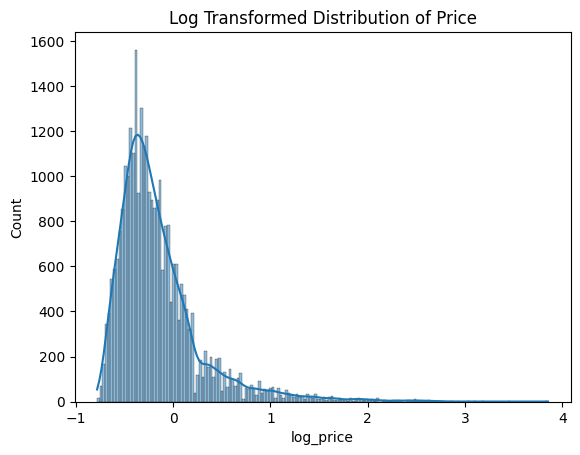

In [35]:
df_scaled['log_house_size'] = np.log1p(df_scaled['house_size'])
df_scaled['log_price'] = np.log1p(df_scaled['price'])
sns.histplot(df_scaled['log_house_size'], kde=True).set_title('Log Transformed Distribution of House Size')
plt.show()
sns.histplot(df_scaled['log_price'], kde=True).set_title('Log Transformed Distribution of Price')
plt.show()


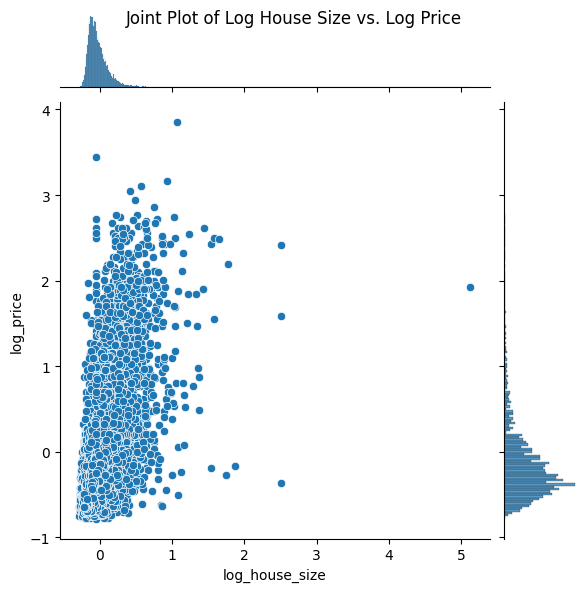

In [36]:
# Log scale transformation of house size and log price
df_scaled['log_house_size'] = np.log(df_scaled['house_size'] + 1)  # Adding 1 to avoid log(0)
df_scaled['log_price'] = np.log(df_scaled['price'] + 1)

# Joint plot with log scale
sns.jointplot(x='log_house_size', y='log_price', data=df_scaled, kind='scatter')
plt.suptitle('Joint Plot of Log House Size vs. Log Price')
plt.show()

There is a positive relationship between log_house_size and log_price, indicating that as house size increases, price generally increases as well.
Most data points are clustered in the middle range of both log_house_size and log_price, suggesting that typical houses have moderate sizes and prices.
The spread of data points suggests variability in house prices even for houses of similar sizes, reflecting factors beyond size that influence the house price.

In [37]:
#Filtering the dataset to remove extreme outliers beyond a certain threshold
threshold_price = df_scaled['price'].quantile(0.99)
threshold_house_size = df_scaled['house_size'].quantile(0.99)
df_final = df_final[(df_scaled['price'] < threshold_price) & (df_scaled['house_size'] < threshold_house_size)]

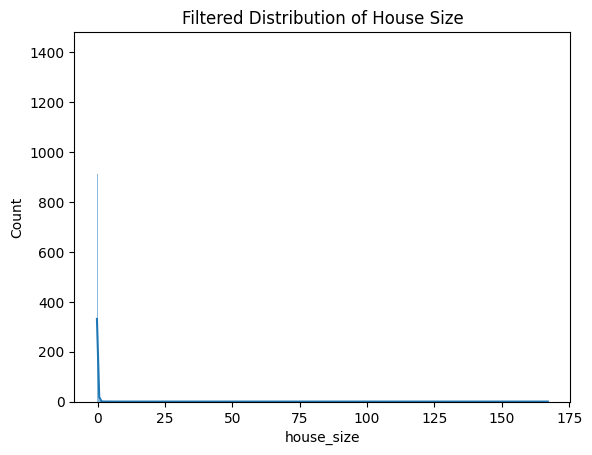

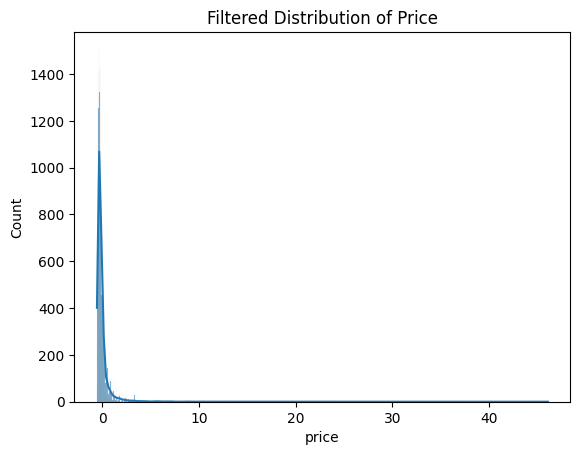

In [38]:
sns.histplot(df_scaled['house_size'], kde=True).set_title('Filtered Distribution of House Size')
plt.show()
sns.histplot(df_scaled['price'], kde=True).set_title('Filtered Distribution of Price')
plt.show()


In [39]:
#Droping the columns log_house_price and log_price
df_scaled.drop(['log_house_size', 'log_price'], axis=1, inplace=True)


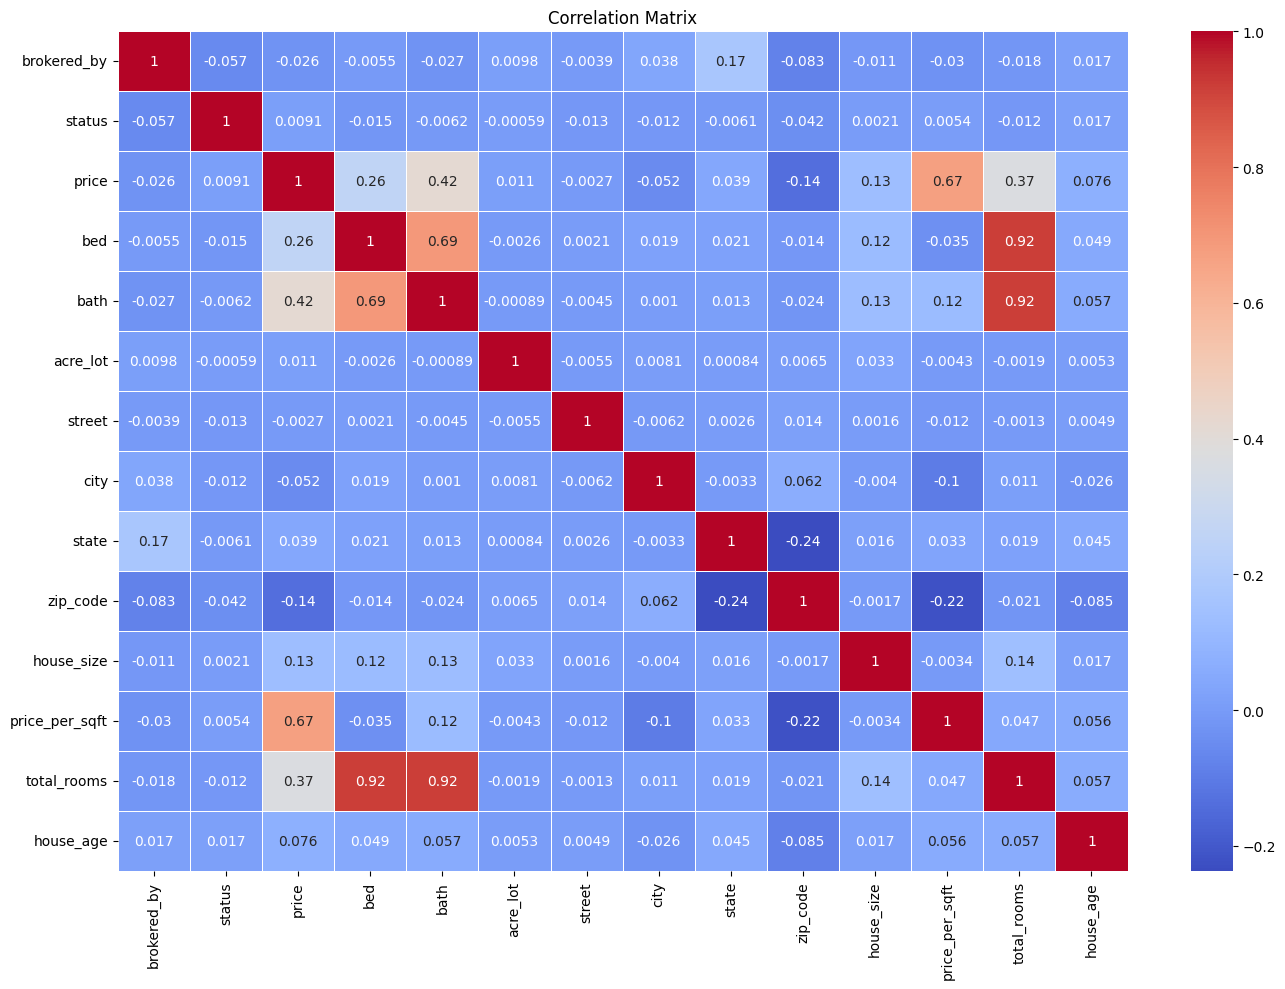

In [40]:
# Creating a correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Insights:

Price and Other Variables:
   - Positive Correlations:
     - `bath (0.18)`, `house_size (0.20)`, `log_house_size (0.31)`
   - Weaker Correlations:
     - `bed (0.11)`, `acre_lot (0.0072)`
   Higher prices are associated with more bathrooms, larger house sizes, and larger lot sizes, though these relationships are not very strong.

Bed and Bath:
   - Strong Correlation (0.62): Houses with more bedrooms generally have more bathrooms.

Prev Sold Date and Status:
   - Strong Correlation (0.69): Indicates a significant relationship between the date a house was previously sold and its current status.

Price Determinants: Bathrooms, house size, and house size show some correlation with price, while other factors have a minor impact.


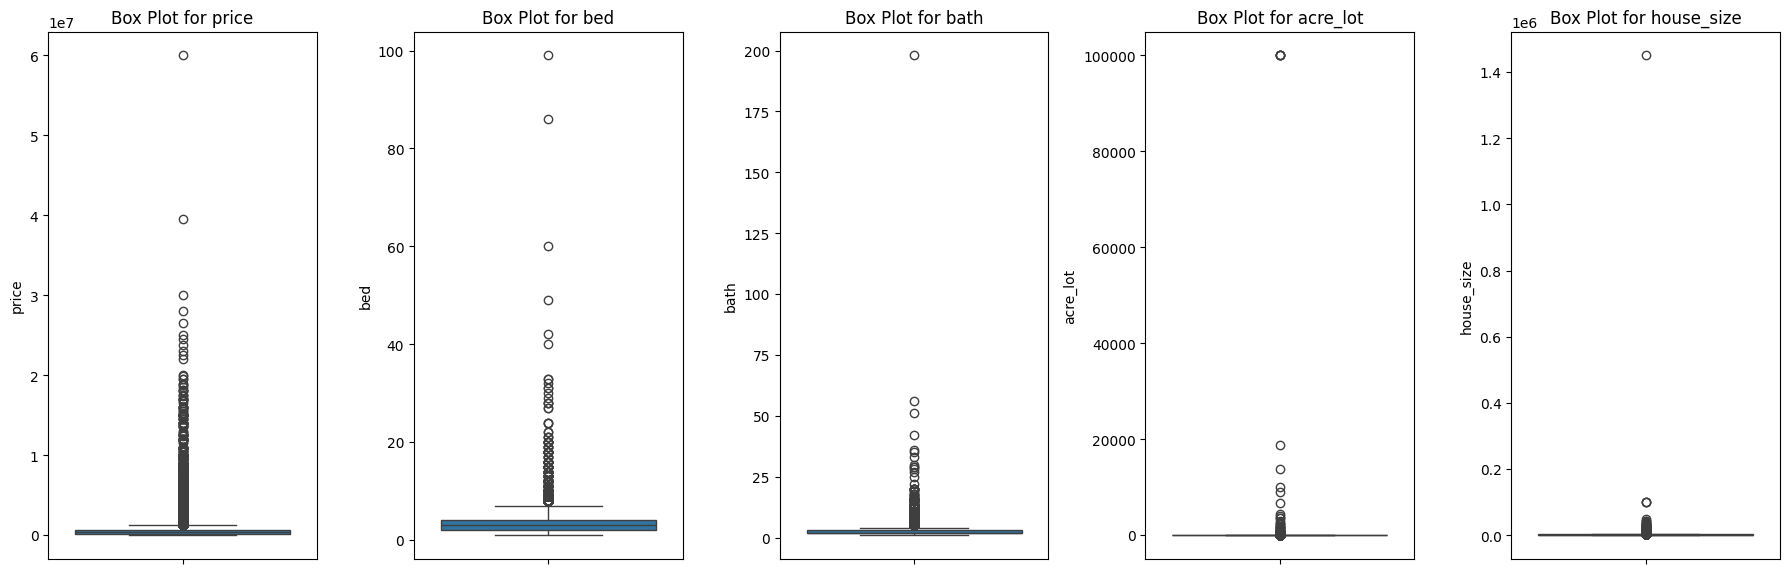

In [41]:
# List of numerical columns to check for outliers
numerical_columns = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

# Creating box plots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
for ax, var in zip(axes, numerical_columns):
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Box Plot for {var}')
plt.tight_layout()
plt.show()



This ensures that the DataFrame only contains complete data for these important metrics related to price_per_sqft, total_rooms and house_age.


*  Outliers: The presence of extreme outliers in the data suggests that some
properties are priced much higher per square foot compared to others.

*  Price Distribution by Status: The price per square foot varies across different statuses, with category 0 having the most variability and outliers.

In [42]:
# Checking for any NaN values
print(df_scaled.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
price_per_sqft    0
total_rooms       0
house_age         0
dtype: int64


Step 6: Splitting Data

In [78]:
# Separating the features (X) and the target variable (y) from the scaled DataFrame
X = df_scaled.drop('price', axis=1)  # Dropping the 'price' column to use as features
y = df_scaled['price']  # Using the 'price' column as the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using 80% of the data for training and 20% for testing
# random_state=42 ensures reproducibility of the split


Step 7: Model Training

In [79]:
# Defining a dictionary of models to train

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Initializing a dictionary to store the results
results = {}

# Training each model and evaluating its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - MSE: {mse}, R2: {r2}")



Linear Regression - MSE: 0.2962257098728855, R2: 0.68323434276196
Decision Tree - MSE: 0.07063026380047233, R2: 0.9244723155756689
Neural Network - MSE: 3.0654598801095774, R2: -2.2780153149989477
Random Forest - MSE: 0.07377665962882783, R2: 0.9211077523075861


Based on the results, the Decision Tree and Random forest models have the best performance, with the Decision Tree model slightly outperforming the Random Forest model in terms of Mean Squared Error (MSE) and R-squared (R²) values.

In [84]:
# Hyperparameter tuning for Decision Tree

# Reducing the dataset size for quicker tuning (e.g., using 10% of the data)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Defining the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

# Initializing the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              param_grid_dt,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=1)  # Disable parallel processing for debugging

# Fit the model
grid_search_dt.fit(X_train_sample, y_train_sample)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Predict with the best model
y_pred_best_dt = best_dt_model.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f"Best Decision Tree - MSE: {mse_best_dt}, R2: {r2_best_dt}")



Best Decision Tree - MSE: 0.2022787242941275, R2: 0.7836955034260968


In [88]:
# Find the best model based on MSE and R2
best_model_name = min(results, key=lambda k: results[k]['MSE'])
best_model_performance = results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"MSE: {best_model_performance['MSE']}")
print(f"R2: {best_model_performance['R2']}")


Best Model: Decision Tree
MSE: 0.07063026380047233
R2: 0.9244723155756689


Implementing the Best Model (Decision Tree) in Flask


In [95]:
# Saving the best model

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_dt_model, f)
    print("Best model saved successfully!")

Best model saved successfully!


In [92]:
# After fitting the scaler on your data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [96]:
import nbformat
from nbconvert import HTMLExporter

# Define the paths
notebook_file_path = '/content/drive/MyDrive/Colab Notebooks/houseprice.ipynb'
output_html_file_path = '/content/drive/MyDrive/Colab Notebooks/houseprice.html'

# Load the notebook
with open(notebook_file_path) as f:
    nb = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Write the HTML output to a file
with open(output_html_file_path, 'w') as f:
    f.write(body)

print(f"Notebook converted to HTML and saved to {output_html_file_path}")


Notebook converted to HTML and saved to /content/drive/MyDrive/Colab Notebooks/houseprice.html
